In [ ]:
from google.colab import files

In [ ]:
from scipy.optimize import minimize, NonlinearConstraint
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_trustregion_constr/projections.py:181: UserWarning: Singular Jacobian matrix. Using SVD decomposition to perform the factorizations.
  warn('Singular Jacobian matrix. Using SVD decomposition to ' +


Current iteration - Optimal values:  1.0 1.0 [0. 0. 0.] [0. 0. 0.]


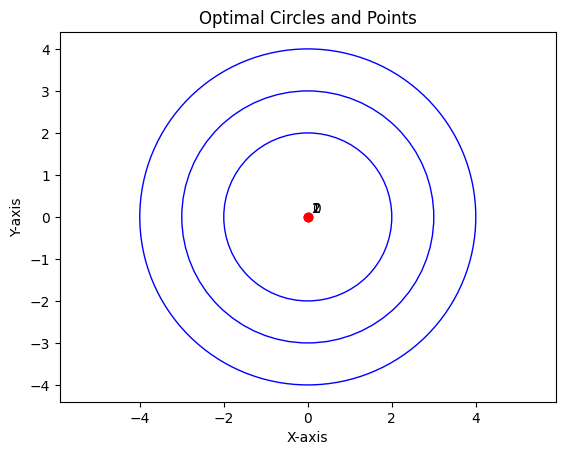

Current iteration - Optimal values:  1.0443000045980297 1.0166451905811626 [-0.02806583 -0.02859026 -0.02700195] [ 0.04684599 -0.04046396  0.03903833]


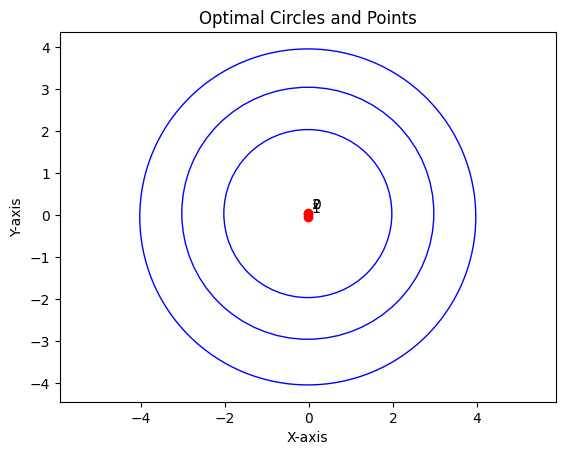

Current iteration - Optimal values:  1.2649841777438435 0.9630631847919069 [-0.15709658 -0.15271676 -0.16322362] [ 0.48199993 -0.43634661  0.3190091 ]


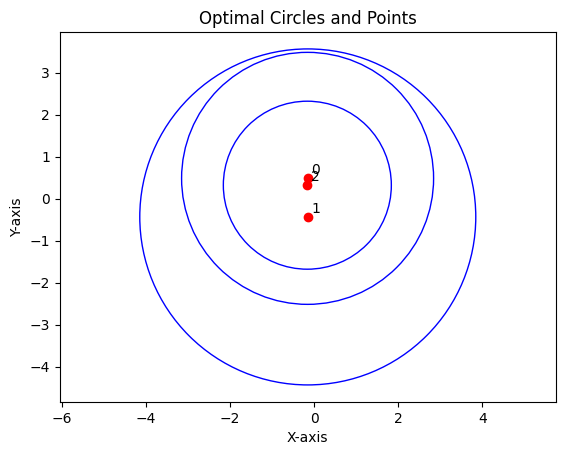

Current iteration - Optimal values:  1.2649841777438435 0.9630631847919069 [-0.15709658 -0.15271676 -0.16322362] [ 0.48199993 -0.43634661  0.3190091 ]


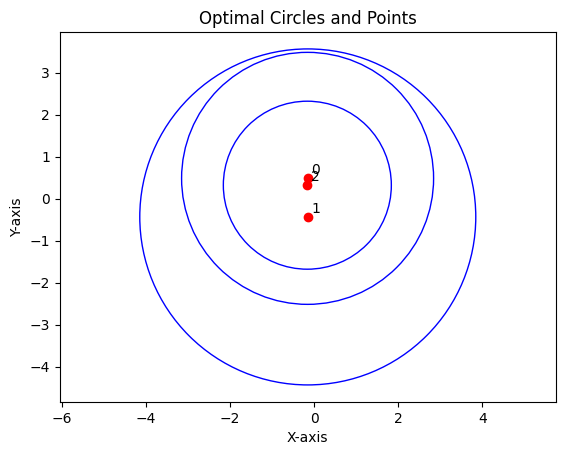

Current iteration - Optimal values:  1.3667226964376642 0.8553824251797217 [-0.24272524 -0.23859684 -0.25806001] [ 0.99847826 -1.14767227  0.56758874]


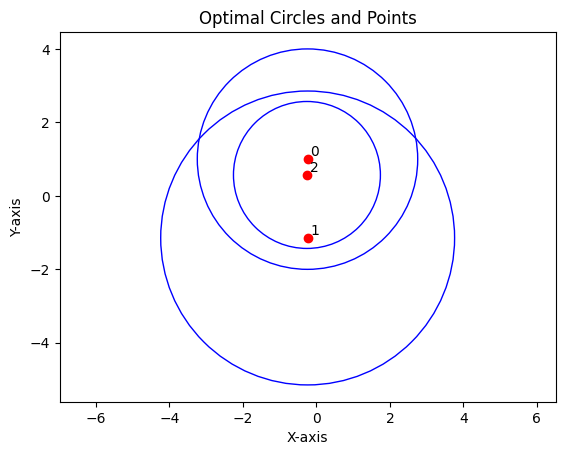

Current iteration - Optimal values:  1.3667226964376642 0.8553824251797217 [-0.24272524 -0.23859684 -0.25806001] [ 0.99847826 -1.14767227  0.56758874]


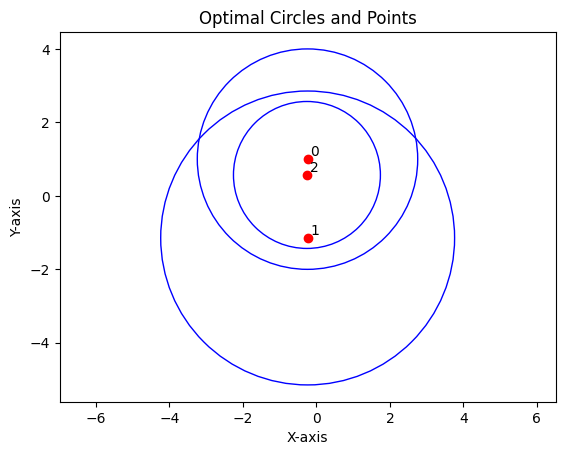

Current iteration - Optimal values:  1.8928856553415487 0.5972973690916438 [-0.55720314 -0.53345204 -0.58290496] [ 2.68873901 -3.50358477  1.30920035]


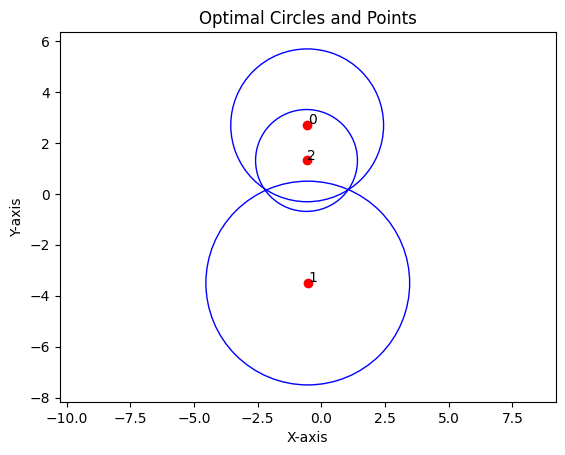

Current iteration - Optimal values:  1.9027150832626685 0.5042662090475594 [-0.36434814 -0.35565862 -0.45825054] [ 3.1864132  -4.13434222  1.46302473]


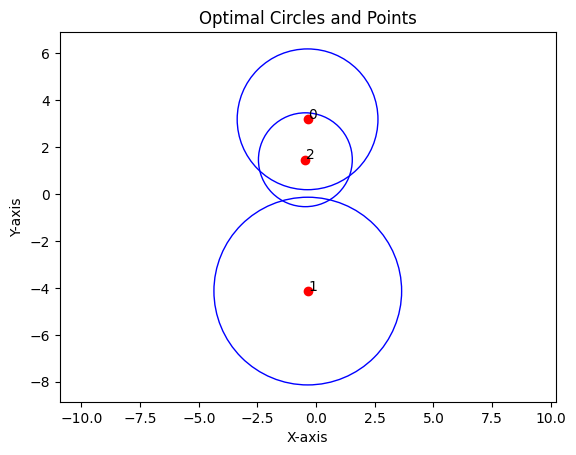

Current iteration - Optimal values:  1.7561952907537954 0.5492157086615477 [-0.25020275 -0.27979526 -0.40255732] [ 3.18343315 -4.00900099  1.36502832]


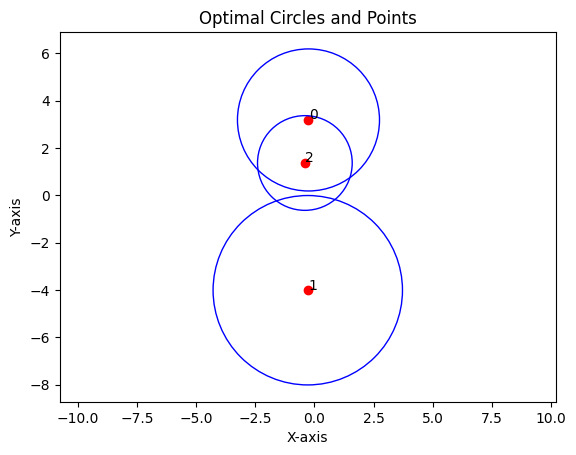

Current iteration - Optimal values:  1.7287877495359725 0.6315898242625113 [-0.14701258 -0.27920048 -0.4569971 ] [ 3.29649244 -4.08213095  1.34914976]


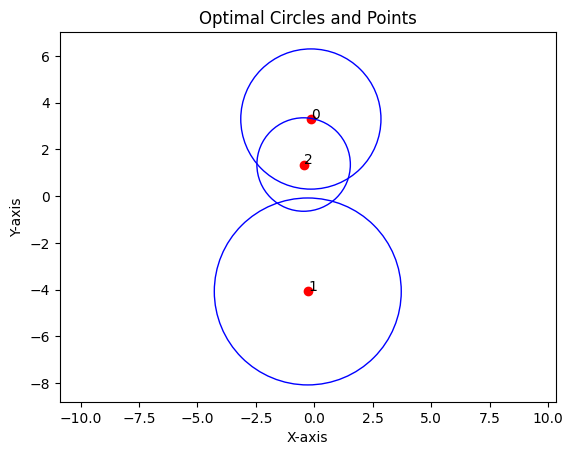

Current iteration - Optimal values:  1.6313850192368264 0.7443716919284098 [ 0.04620561 -0.26329037 -0.59790736] [ 3.2625884  -3.96870854  1.29765741]


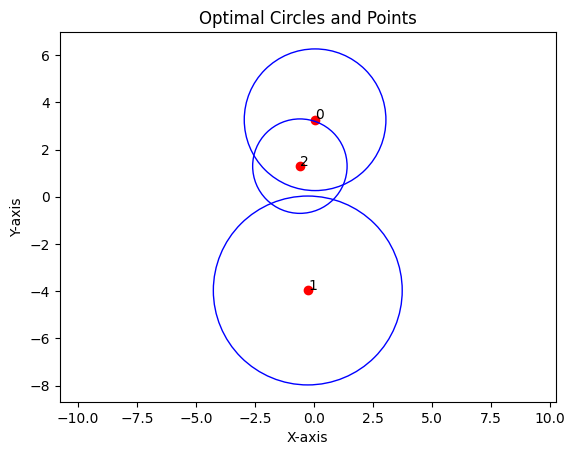

Current iteration - Optimal values:  1.5986044896426423 0.9676577758804549 [ 0.36185628 -0.22030393 -0.90324437] [ 3.3900625  -4.07916989  1.32543622]


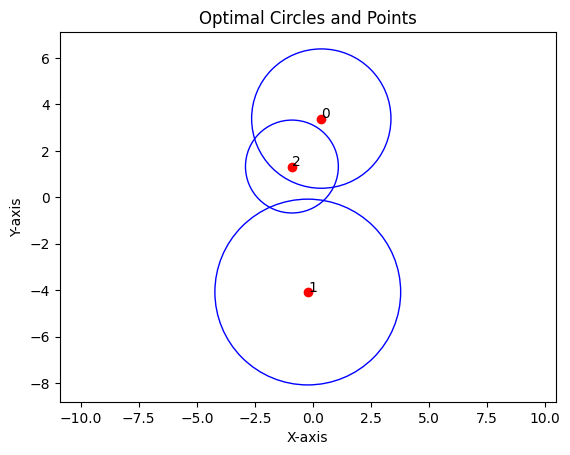

Current iteration - Optimal values:  1.4334205839852123 1.3481225450645375 [ 0.84342407  0.01885817 -1.05786807] [ 3.22482637 -3.83798809  1.29028957]


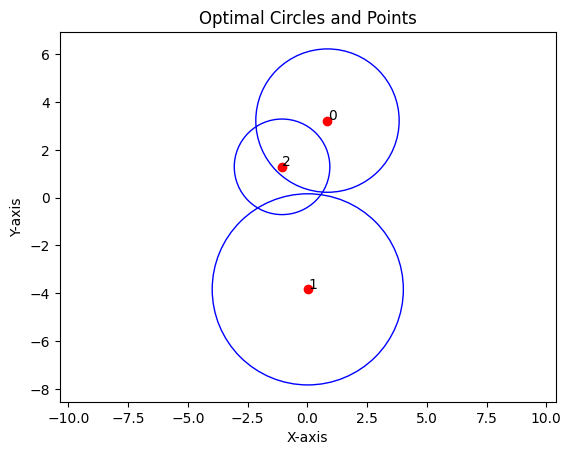

Current iteration - Optimal values:  1.513745355129116 1.6435196113724166 [ 1.34482932  0.21947392 -1.42358389] [ 3.4132293  -4.08794071  1.3903393 ]


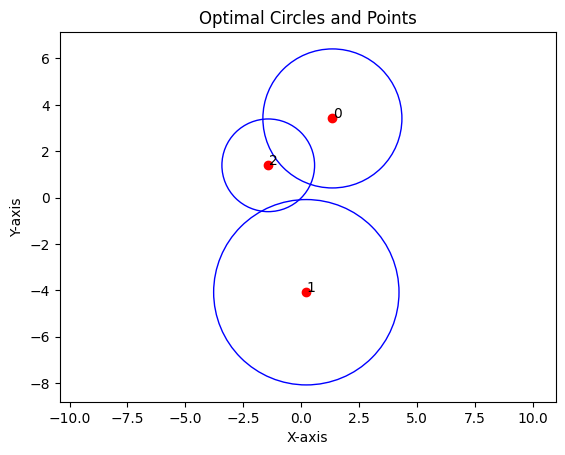

Current iteration - Optimal values:  1.5631008416592342 1.9791054418252467 [ 1.91303279  0.5218205  -1.55776129] [ 3.1524962  -3.72371441  1.33146551]


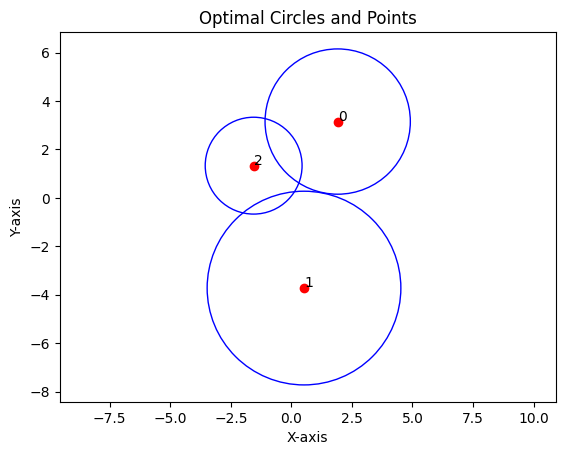

Current iteration - Optimal values:  1.591948577809865 2.0268687307266995 [ 2.17897348  0.69370663 -1.86037943] [ 3.28691286 -3.95061878  1.42075436]


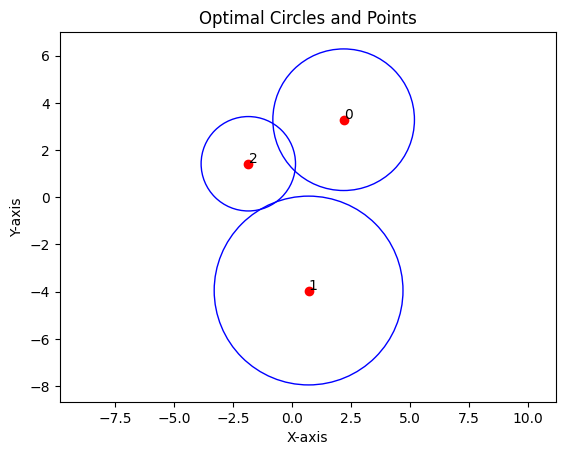

Current iteration - Optimal values:  1.6031750306918777 2.2462614875875437 [ 2.44834687  0.78382776 -1.98809988] [ 3.1096361  -3.68970189  1.38339349]


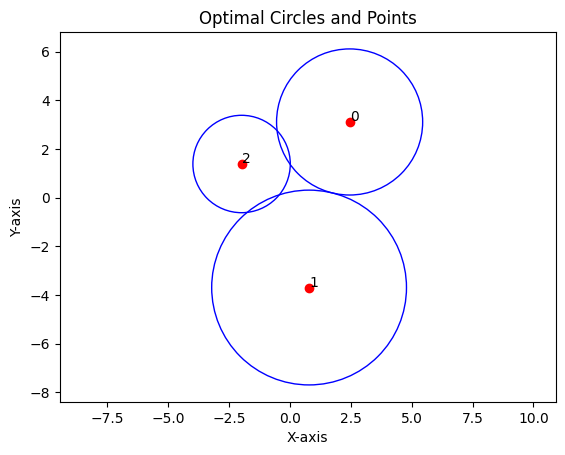

Current iteration - Optimal values:  1.6395330686811564 2.339370593937 [ 2.65489748  0.84662165 -2.1835216 ] [ 3.14337588 -3.73273579  1.42648695]


KeyboardInterrupt: ignored

In [ ]:
def objective_function(variables):
    H, W = variables[0], variables[1]
    return H * W

def inequality_constraint(variables):
    H, W = variables[:2]
    x_values = variables[2 : n + 2]
    y_values = variables[n + 2: ]
    constraints = []

    for index in range(n):
        constraints += [
            r[index] - x_values[index],
            x_values[index] - r[index] - W,
            -(x_values[index] + r[index]),
            x_values[index] + r[index] - W,
            y_values[index] - r[index] - H,
            r[index] - y_values[index],
            y_values[index] + r[index] - H,
        ]

    for i in range(n):
        for j in range(i + 1, n):
            if [i, j] not in adjacency:
                constraints.append(
                    (r[i] + r[j]) ** 2 - (x_values[i] - x_values[j]) ** 2 - (y_values[i] - y_values[j]) ** 2
                )

    return np.array(constraints)

def equality_constraint(variables):
    x_values = variables[2 : n + 2]
    y_values = variables[n + 2 : ]
    constraints = []
    for index in gamma:
        constraints.append(y_values[index] - r[index])

    for k1, k2 in adjacency:
        constraints.append(
            (x_values[k1] - x_values[k2]) ** 2 + (y_values[k1] - y_values[k2]) ** 2 - (r[k1] + r[k2]) ** 2
        )

    return np.array(constraints)

def plot_circles_and_points(optimal_x, optimal_y, r, mapping):
    fig, ax = plt.subplots()
    for i in range(n):
        circle = plt.Circle((optimal_x[i], optimal_y[i]), r[i], fill=False, color="blue")
        ax.add_patch(circle)
        plt.scatter(optimal_x[i], optimal_y[i], color="red")
        plt.text(optimal_x[i] + 0.2, optimal_y[i] + 0.2, mapping[i], fontsize=10, ha="center", va="center", color="black")

    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("Optimal Circles and Points")
    plt.axis("equal")
    plt.show()

def generate_inputs():
    mapping, index_val = dict(), dict()
    count = 0
    r, gamma, adjacency = [], [], []
    print("Upload the file sizes.txt:")
    uploaded_sizes = files.upload()
    for filename, content in uploaded_sizes.items():
        with open("sizes.txt", "r") as file:
            for line in file:
                str_value, size_value = line.strip().split(",")
                mapping[count] = str_value
                index_val[str_value] = count
                r.append(float(size_value))
                count += 1
    n = count
    count = 0
    print("Upload the file anchors.txt:")
    uploaded_anchors = files.upload()
    for filename, content in uploaded_anchors.items():
        with open("anchors.txt", "r") as file:
            for line in file:
                gamma.append(index_val[line.strip()])
                count += 1
    gammas = count
    count = 0
    print("Upload the file edges.txt:")
    uploaded_edges = files.upload()
    for filename, content in uploaded_edges.items():
        with open("edges.txt", "r") as file:
            for line in file:
                str1, str2 = line.strip().split(",")
                k1, k2 = index_val[str1], index_val[str2]
                if k1 > k2:
                    k1, k2 = k2, k1
                adjacency.append([k1, k2])
                count += 1
    adjacencies = count
    return n, gammas, adjacencies, r, gamma, adjacency, mapping

if __name__ == "__main__":
    # n, gammas, adjacencies, r, gamma, adjacency, mapping = generate_inputs()
    n, gammas, adjacencies, r, gamma, adjacency, mapping = 15, 5, 7, [3, 4, 2, ], [0, 2], [[1, 2], [0, 1]], {0: "0", 1: "1", 2: "2"}
    initial_guess = [1.0, 1.0] + [0.0] * (2 * n)
    bounds = [(0, None)] * 2 + [(0, None)] * (2 * n)

    constraints = [
        NonlinearConstraint(fun=inequality_constraint, lb=-np.inf, ub=0),
        NonlinearConstraint(fun=equality_constraint, lb=0, ub=0)
    ]

    def callback_function(xk, state):
        optimal_H = xk[0]
        optimal_W = xk[1]
        optimal_x = xk[2 : n + 2]
        optimal_y = xk[n + 2 :]

        print("Current iteration - Optimal values: ", optimal_H, optimal_W, optimal_x, optimal_y)
        plot_circles_and_points(optimal_x, optimal_y, r, mapping)

    result = minimize(
        fun=lambda variables: objective_function(variables),
        x0=initial_guess,
        bounds=bounds,
        constraints=constraints,
        method="trust-constr",
        callback=callback_function
    )

    optimal_H, optimal_W, optimal_x, optimal_y = result.x[0], result.x[1], result.x[2 : n + 2], result.x[n + 2 :]

    print("Optimal values: ", optimal_H, optimal_W, optimal_x, optimal_y)
    plot_circles_and_points(optimal_x, optimal_y, r, mapping)

In [ ]:
def objective_function(variables):
    H, W = variables[0], variables[1]
    return H * W

def inequality_constraint(variables):
    H, W = variables[:2]
    x_values = variables[2 : n + 2]
    y_values = variables[n + 2: ]
    constraints = []

    for index in range(n):
        constraints += [
            r[index] - x_values[index],
            x_values[index] - r[index] - W,
            -(x_values[index] + r[index]),
            x_values[index] + r[index] - W,
            y_values[index] - r[index] - H,
            r[index] - y_values[index],
            y_values[index] + r[index] - H,
        ]

    for i in range(n):
        for j in range(i + 1, n):
            if [i, j] not in adjacency:
                constraints.append(
                    (r[i] + r[j]) ** 2 - (x_values[i] - x_values[j]) ** 2 - (y_values[i] - y_values[j]) ** 2
                )

    return np.array(constraints)

def equality_constraint(variables):
    x_values = variables[2 : n + 2]
    y_values = variables[n + 2 : ]
    constraints = []
    for index in gamma:
        constraints.append(y_values[index] - r[index])

    for k1, k2 in adjacency:
        constraints.append(
            (x_values[k1] - x_values[k2]) ** 2 + (y_values[k1] - y_values[k2]) ** 2 - (r[k1] + r[k2]) ** 2
        )

    return np.array(constraints)

def plot_circles_and_points(optimal_x, optimal_y, r, mapping):
    fig, ax = plt.subplots()
    for i in range(n):
        circle = plt.Circle((optimal_x[i], optimal_y[i]), r[i], fill=False, color="blue")
        ax.add_patch(circle)
        plt.text(optimal_x[i] + 0.2, optimal_y[i] + 0.2, mapping[i], fontsize=10, ha="center", va="center", color="black")

    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("Optimal Circles and Points")
    plt.axis("equal")
    plt.show()

def generate_inputs():
    mapping, index_val = dict(), dict()
    count = 0
    r, gamma, adjacency = [], [], []
    print("Upload the file sizes.txt:")
    uploaded_sizes = files.upload()
    for filename, content in uploaded_sizes.items():
        with open("sizes.txt", "r") as file:
            for line in file:
                str_value, size_value = line.strip().split(",")
                mapping[count] = str_value
                index_val[str_value] = count
                r.append(float(size_value))
                count += 1
    n = count
    count = 0
    print("Upload the file anchors.txt:")
    uploaded_anchors = files.upload()
    for filename, content in uploaded_anchors.items():
        with open("anchors.txt", "r") as file:
            for line in file:
                gamma.append(index_val[line.strip()])
                count += 1
    gammas = count
    count = 0
    print("Upload the file edges.txt:")
    uploaded_edges = files.upload()
    for filename, content in uploaded_edges.items():
        with open("edges.txt", "r") as file:
            for line in file:
                str1, str2 = line.strip().split(",")
                k1, k2 = index_val[str1], index_val[str2]
                if k1 > k2:
                    k1, k2 = k2, k1
                adjacency.append([k1, k2])
                count += 1
    adjacencies = count
    return n, gammas, adjacencies, r, gamma, adjacency, mapping

if __name__ == "__main__":
    n, gammas, adjacencies, r, gamma, adjacency, mapping = generate_inputs()

    initial_guess = [1.0, 1.0] + [0.0] * (2 * n)
    bounds = [(0, None)] * 2 + [(0, None)] * (2 * n)

    constraints = [
        NonlinearConstraint(fun=inequality_constraint, lb=-np.inf, ub=0),
        NonlinearConstraint(fun=equality_constraint, lb=0, ub=0)
    ]

    def callback_function(xk, state):
        optimal_H = xk[0]
        optimal_W = xk[1]
        optimal_x = xk[2 : n + 2]
        optimal_y = xk[n + 2 :]

        print("Current iteration - Optimal values: ", optimal_H, optimal_W, optimal_x, optimal_y)
        plot_circles_and_points(optimal_x, optimal_y, r, mapping)


    result = minimize(
        fun=lambda variables: objective_function(variables),
        x0=initial_guess,
        bounds=bounds,
        constraints=constraints,
        method='trust-constr',
        callback=callback_function
    )

Upload the file sizes.txt:


In [ ]:
def objective_function(variables):
    H, W = variables[0], variables[1]
    return H * W

def inequality_constraint(variables):
    H, W = variables[:2]
    x_values = variables[2 : n + 2]
    y_values = variables[n + 2: ]
    constraints = []

    for index in range(n):
        constraints += [
            r[index] - x_values[index],
            x_values[index] - r[index] - W,
            -(x_values[index] + r[index]),
            x_values[index] + r[index] - W,
            y_values[index] - r[index] - H,
            r[index] - y_values[index],
            y_values[index] + r[index] - H,
        ]

    for i in range(n):
        for j in range(i + 1, n):
            if [i, j] not in adjacency:
                constraints.append(
                    (r[i] + r[j]) ** 2 - (x_values[i] - x_values[j]) ** 2 - (y_values[i] - y_values[j]) ** 2
                )

    return np.array(constraints)

def equality_constraint(variables):
    x_values = variables[2 : n + 2]
    y_values = variables[n + 2 : ]
    constraints = []
    for index in gamma:
        constraints.append(y_values[index] - r[index])

    for k1, k2 in adjacency:
        constraints.append(
            (x_values[k1] - x_values[k2]) ** 2 + (y_values[k1] - y_values[k2]) ** 2 - (r[k1] + r[k2]) ** 2
        )

    return np.array(constraints)

def plot_circles_and_points(optimal_x, optimal_y, r, mapping):
    fig, ax = plt.subplots()
    for i in range(n):
        circle = plt.Circle((optimal_x[i], optimal_y[i]), r[i], fill=False, color="blue")
        ax.add_patch(circle)
        plt.text(optimal_x[i] + 0.2, optimal_y[i] + 0.2, mapping[i], fontsize=10, ha="center", va="center", color="black")

    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("Optimal Circles and Points")
    plt.axis("equal")
    plt.show()

def generate_inputs():
    mapping, index_val = dict(), dict()
    count = 0
    r, gamma, adjacency = [], [], []
    print("Upload the file sizes.txt:")
    uploaded_sizes = files.upload()
    for filename, content in uploaded_sizes.items():
        with open("sizes.txt", "r") as file:
            for line in file:
                str_value, size_value = line.strip().split(",")
                mapping[count] = str_value
                index_val[str_value] = count
                r.append(float(size_value))
                count += 1
    n = count
    count = 0
    print("Upload the file anchors.txt:")
    uploaded_anchors = files.upload()
    for filename, content in uploaded_anchors.items():
        with open("anchors.txt", "r") as file:
            for line in file:
                gamma.append(index_val[line.strip()])
                count += 1
    gammas = count
    count = 0
    print("Upload the file edges.txt:")
    uploaded_edges = files.upload()
    for filename, content in uploaded_edges.items():
        with open("edges.txt", "r") as file:
            for line in file:
                str1, str2 = line.strip().split(",")
                k1, k2 = index_val[str1], index_val[str2]
                if k1 > k2:
                    k1, k2 = k2, k1
                adjacency.append([k1, k2])
                count += 1
    adjacencies = count
    return n, gammas, adjacencies, r, gamma, adjacency, mapping

if __name__ == "__main__":
    n, gammas, adjacencies, r, gamma, adjacency, mapping = generate_inputs()
    initial_guess = [1.0, 1.0] + [0.0] * (2 * n)
    constraints = [
        #NonlinearConstraint(fun=inequality_constraint, lb=-np.inf, ub=0),
        NonlinearConstraint(fun=equality_constraint, lb=0, ub=0)
    ]

    def callback_function(xk, state):
        optimal_H = xk[0]
        optimal_W = xk[1]
        optimal_x = xk[2 : n + 2]
        optimal_y = xk[n + 2 :]
        print("Current iteration - Optimal values: ", optimal_H, optimal_W, optimal_x, optimal_y)
        plot_circles_and_points(optimal_x, optimal_y, r, mapping)


    result = minimize(
        fun=lambda variables: objective_function(variables),
        x0=initial_guess,
        constraints=constraints,
        method='trust-constr',
        callback=callback_function
    )

Upload the file sizes.txt:


Saving sizes.txt to sizes (2).txt
Upload the file anchors.txt:


Saving anchors.txt to anchors (2).txt
Upload the file edges.txt:


Saving edges.txt to edges (2).txt
Current iteration - Optimal values:  1.0 1.0 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


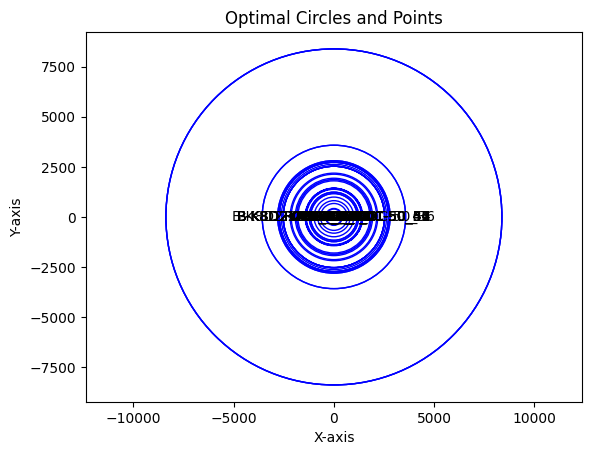

Current iteration - Optimal values:  1.0638149425436474 1.0638257257523838 [0.02124158 0.02124158 0.02124158 0.02124158 0.02124158 0.02124158
 0.02124158 0.02124159 0.02124158 0.02124158 0.02124158 0.02124158
 0.02124158 0.02124158 0.02124159 0.02124158 0.02124158 0.02124158
 0.02124158 0.02124158 0.02124158 0.02124158 0.02124159 0.02124158
 0.02124158 0.02124158 0.02124158 0.02124158 0.02124158 0.02124158
 0.02124158 0.02124158 0.02124158 0.02124158 0.02124158 0.02124158
 0.02124158 0.02124158 0.02124158 0.02124158 0.02124158 0.02124158
 0.02124158 0.02124158 0.02124158 0.02124158 0.02124158 0.02124158
 0.02124158 0.02124166 0.02124158 0.0212416  0.02124158 0.02124159
 0.02124158 0.02124165 0.02124158 0.02124158 0.02124158 0.02124158
 0.02124158 0.02124158 0.02124158 0.02124158 0.02124158] [0.02122968 0.0212263  0.02122968 0.02122855 0.02122968 0.02122855
 0.02122968 0.02123522 0.02122968 0.02122968 0.02122968 0.02122968
 0.02123319 0.02122968 0.02123522 0.02122968 0.02122968 0.021229

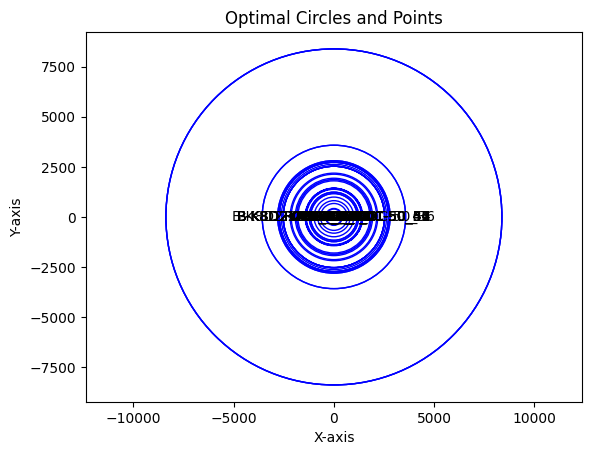

Current iteration - Optimal values:  1.750981941867861 1.7511135117178704 [0.24461111 0.24461111 0.24461111 0.2446111  0.24461111 0.2446111
 0.24461111 0.24461584 0.24461111 0.24461111 0.24461111 0.24461111
 0.24460819 0.24461111 0.24461584 0.24461111 0.24461111 0.24461111
 0.24460823 0.24461111 0.24460823 0.24461111 0.24461584 0.24461111
 0.24461111 0.24461111 0.24461111 0.24461111 0.24460821 0.24461111
 0.24460821 0.24461111 0.24460821 0.24461111 0.24460821 0.24461111
 0.24460821 0.24461111 0.24460821 0.24461111 0.24461118 0.24461111
 0.24461118 0.24460841 0.24461111 0.24460841 0.24461111 0.24461111
 0.2446111  0.24461117 0.2446081  0.24461125 0.24461112 0.24461115
 0.2446111  0.24461102 0.24460809 0.2446112  0.24461117 0.24460817
 0.24460817 0.24460817 0.24460817 0.24460817 0.24460817] [0.24447423 0.24442865 0.24447423 0.24445993 0.24447423 0.24445993
 0.24447423 0.24456406 0.24447423 0.24447423 0.24447423 0.24447423
 0.2445174  0.24447423 0.24456406 0.24447423 0.24447423 0.24447423

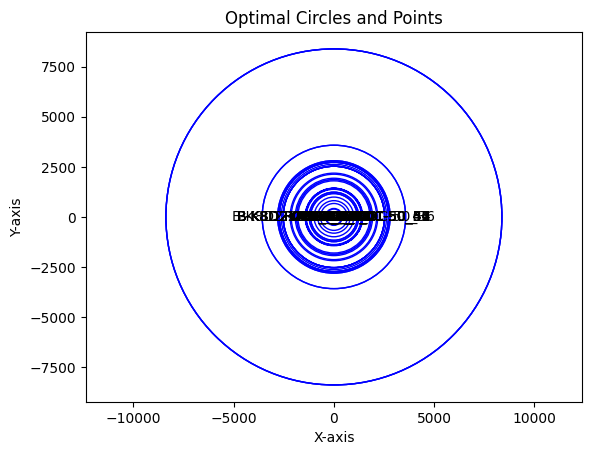

Current iteration - Optimal values:  3.2559131329091793 3.256487843705278 [0.78483443 0.78483483 0.78483443 0.78483458 0.78483443 0.78483458
 0.78483443 0.78485761 0.78483443 0.78483443 0.78483443 0.78483443
 0.7848155  0.78483443 0.78485761 0.78483443 0.78483443 0.78483443
 0.78481538 0.78483443 0.78481538 0.78483443 0.78485761 0.78483443
 0.78483443 0.78483443 0.78483443 0.78483443 0.78481543 0.78483443
 0.78481543 0.78483443 0.78481543 0.78483443 0.78481543 0.78483443
 0.78481543 0.78483443 0.78481543 0.78483443 0.7848341  0.78483443
 0.7848341  0.7848149  0.78483443 0.7848149  0.78483443 0.78483446
 0.78483464 0.78483102 0.78481578 0.78483536 0.78483441 0.78483508
 0.78483465 0.78483076 0.78481582 0.78483405 0.78483414 0.78481556
 0.78481556 0.78481556 0.78481556 0.78481556 0.78481556] [0.78444357 0.78432913 0.78444357 0.78441391 0.78444357 0.78441391
 0.78444357 0.78461986 0.78444357 0.78444357 0.78444357 0.78444357
 0.78450987 0.78444357 0.78461986 0.78444357 0.78444357 0.7844435

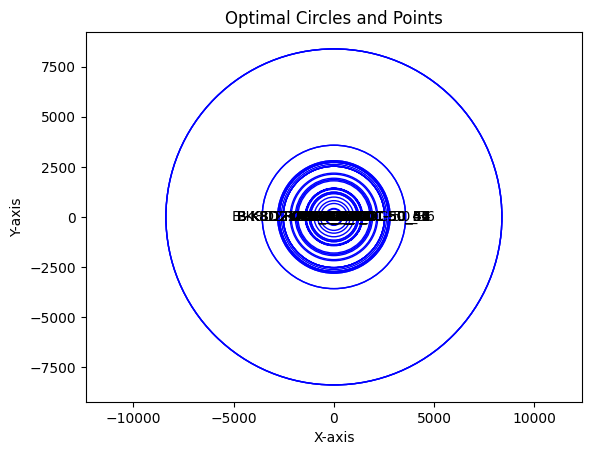

Current iteration - Optimal values:  3.087234937570183 3.0882710606333683 [0.80239619 0.8023967  0.80239619 0.80239639 0.80239619 0.80239639
 0.80239619 0.80241444 0.80239619 0.80239619 0.80239619 0.80239619
 0.80237864 0.80239619 0.80241444 0.80239619 0.80239619 0.80239619
 0.8023785  0.80239619 0.8023785  0.80239619 0.80241444 0.80239619
 0.80239619 0.80239619 0.80239619 0.80239619 0.80237856 0.80239619
 0.80237856 0.80239619 0.80237856 0.80239619 0.80237856 0.80239619
 0.80237856 0.80239619 0.80237856 0.80239619 0.80239576 0.80239619
 0.80239576 0.80237788 0.80239619 0.80237788 0.80239619 0.80239623
 0.80239647 0.80239427 0.80237901 0.80239741 0.80239617 0.80239703
 0.80239648 0.80239391 0.80237906 0.8023957  0.80239582 0.80237872
 0.80237872 0.80237872 0.80237872 0.80237872 0.80237872] [0.80197879 0.80307281 0.80197879 0.80666016 0.80197879 0.80666016
 0.80197879 0.80219692 0.80197879 0.80197879 0.80197879 0.80197879
 0.80207514 0.80197879 0.80219692 0.80197879 0.80197879 0.8019787

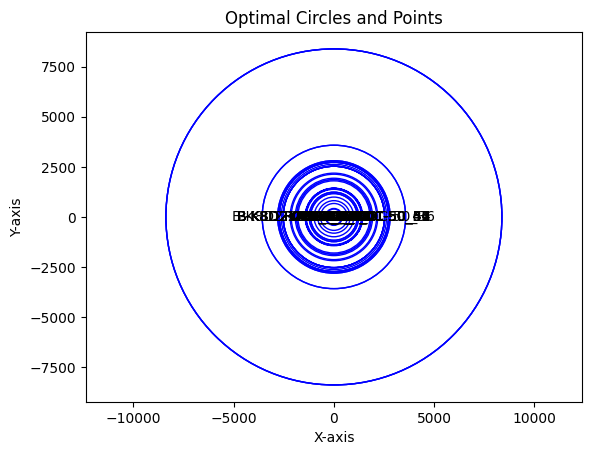

Current iteration - Optimal values:  2.95405452121285 2.991660549843754 [1.179168   1.17916983 1.179168   1.17916875 1.179168   1.17916875
 1.179168   1.17916009 1.179168   1.179168   1.179168   1.179168
 1.17914801 1.179168   1.17916009 1.179168   1.179168   1.179168
 1.17914738 1.179168   1.17914738 1.179168   1.17916009 1.179168
 1.179168   1.179168   1.179168   1.179168   1.17914764 1.179168
 1.17914764 1.179168   1.17914764 1.179168   1.17914764 1.179168
 1.17914764 1.179168   1.17914764 1.179168   1.17916625 1.179168
 1.17916625 1.1791447  1.179168   1.1791447  1.179168   1.17916814
 1.17916906 1.17917345 1.17914957 1.17917211 1.1791679  1.17917094
 1.17916909 1.17917249 1.17914976 1.17916601 1.17916649 1.17914834
 1.17914834 1.17914834 1.17914834 1.17914834 1.17914834] [ 1.19958433  1.20170461  1.19958433  1.20473669  1.19958433  1.20473669
  1.19958433  1.17064407  1.19958433  1.19958433  1.19958433  1.19958433
  1.08982378  1.19958433  1.17064407  1.19958433  1.19958433  1.199

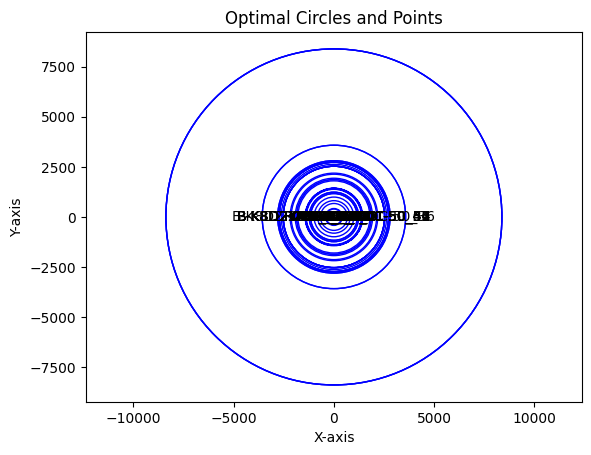

Current iteration - Optimal values:  5.117989762372254 6.158918653939134 [3.3667541  3.36692394 3.3667541  3.36682587 3.3667541  3.36682587
 3.3667541  3.36359251 3.3667541  3.3667541  3.3667541  3.3667541
 3.36630151 3.3667541  3.36359251 3.3667541  3.3667541  3.3667541
 3.36623205 3.3667541  3.36623205 3.3667541  3.36359251 3.3667541
 3.3667541  3.3667541  3.3667541  3.3667541  3.36623727 3.3667541
 3.36623727 3.3667541  3.36623727 3.3667541  3.36623727 3.3667541
 3.36623727 3.3667541  3.36623727 3.3667541  3.36658771 3.3667541
 3.36658771 3.36590838 3.3667541  3.36590838 3.3667541  3.36676852
 3.36685326 3.36732078 3.36644916 3.36706479 3.36674489 3.3670029
 3.36685572 3.36729261 3.36649411 3.36655029 3.36660128 3.36631453
 3.36631453 3.36631453 3.36631453 3.36631453 3.36631453] [  2.48174882   2.48119018   2.45054219   2.41899053   2.48374527
   2.41899053   2.52410787  -1.76902042   2.48374527   2.48374527
   2.48374527   2.43887276  -2.02710371   2.48374527  -1.76902042
   2.4837

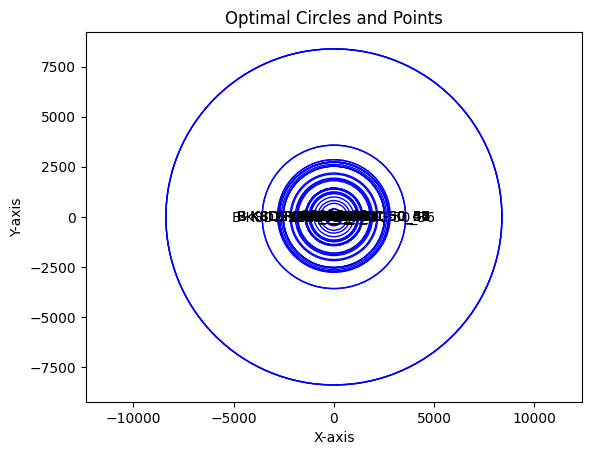

KeyboardInterrupt: ignored

In [ ]:
def objective_function(variables):
    H, W = variables[0], variables[1]
    return H * W

def inequality_constraint(variables):
    H, W = variables[:2]
    x_values = variables[2 : n + 2]
    y_values = variables[n + 2: ]
    constraints = []

    for index in range(n):
        constraints += [
            r[index] - x_values[index],
            x_values[index] - r[index] - W,
            -(x_values[index] + r[index]),
            x_values[index] + r[index] - W,
            y_values[index] - r[index] - H,
            r[index] - y_values[index],
            y_values[index] + r[index] - H,
        ]

    for i in range(n):
        for j in range(i + 1, n):
            if [i, j] not in adjacency:
                constraints.append(
                    (r[i] + r[j]) ** 2 - (x_values[i] - x_values[j]) ** 2 - (y_values[i] - y_values[j]) ** 2
                )

    return np.array(constraints)

def equality_constraint(variables):
    x_values = variables[2 : n + 2]
    y_values = variables[n + 2 : ]
    constraints = []
    for index in gamma:
        constraints.append(y_values[index] - r[index])

    for k1, k2 in adjacency:
        constraints.append(
            (x_values[k1] - x_values[k2]) ** 2 + (y_values[k1] - y_values[k2]) ** 2 - (r[k1] + r[k2]) ** 2
        )

    return np.array(constraints)

def plot_circles_and_points(optimal_x, optimal_y, r, mapping):
    fig, ax = plt.subplots()
    for i in range(n):
        circle = plt.Circle((optimal_x[i], optimal_y[i]), r[i], fill=False, color="blue")
        ax.add_patch(circle)
        plt.text(optimal_x[i] + 0.2, optimal_y[i] + 0.2, mapping[i], fontsize=10, ha="center", va="center", color="black")

    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("Optimal Circles and Points")
    plt.axis("equal")
    plt.show()

def generate_inputs():
    mapping, index_val = dict(), dict()
    count = 0
    r, gamma, adjacency = [], [], []
    print("Upload the file sizes.txt:")
    uploaded_sizes = files.upload()
    for filename, content in uploaded_sizes.items():
        with open("sizes.txt", "r") as file:
            for line in file:
                str_value, size_value = line.strip().split(",")
                mapping[count] = str_value
                index_val[str_value] = count
                r.append(float(size_value))
                count += 1
    n = count
    count = 0
    print("Upload the file anchors.txt:")
    uploaded_anchors = files.upload()
    for filename, content in uploaded_anchors.items():
        with open("anchors.txt", "r") as file:
            for line in file:
                gamma.append(index_val[line.strip()])
                count += 1
    gammas = count
    count = 0
    print("Upload the file edges.txt:")
    uploaded_edges = files.upload()
    for filename, content in uploaded_edges.items():
        with open("edges.txt", "r") as file:
            for line in file:
                str1, str2 = line.strip().split(",")
                k1, k2 = index_val[str1], index_val[str2]
                if k1 > k2:
                    k1, k2 = k2, k1
                adjacency.append([k1, k2])
                count += 1
    adjacencies = count
    return n, gammas, adjacencies, r, gamma, adjacency, mapping

if __name__ == "__main__":
    n, gammas, adjacencies, r, gamma, adjacency, mapping = generate_inputs()
    initial_guess = [1.0, 1.0] + [0.0] * (2 * n)
    constraints = [
        NonlinearConstraint(fun=inequality_constraint, lb=-np.inf, ub=0),
        #NonlinearConstraint(fun=equality_constraint, lb=0, ub=0)
    ]

    def callback_function(xk, state):
        optimal_H = xk[0]
        optimal_W = xk[1]
        optimal_x = xk[2 : n + 2]
        optimal_y = xk[n + 2 :]
        print("Current iteration - Optimal values: ", optimal_H, optimal_W, optimal_x, optimal_y)
        plot_circles_and_points(optimal_x, optimal_y, r, mapping)


    result = minimize(
        fun=lambda variables: objective_function(variables),
        x0=initial_guess,
        constraints=constraints,
        method='trust-constr',
        callback=callback_function
    )

Upload the file sizes.txt:


Saving sizes.txt to sizes (3).txt
Upload the file anchors.txt:


Saving anchors.txt to anchors (3).txt
Upload the file edges.txt:


Saving edges.txt to edges (3).txt


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_trustregion_constr/projections.py:181: UserWarning: Singular Jacobian matrix. Using SVD decomposition to perform the factorizations.
  warn('Singular Jacobian matrix. Using SVD decomposition to ' +


Current iteration - Optimal values:  1.0 1.0 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


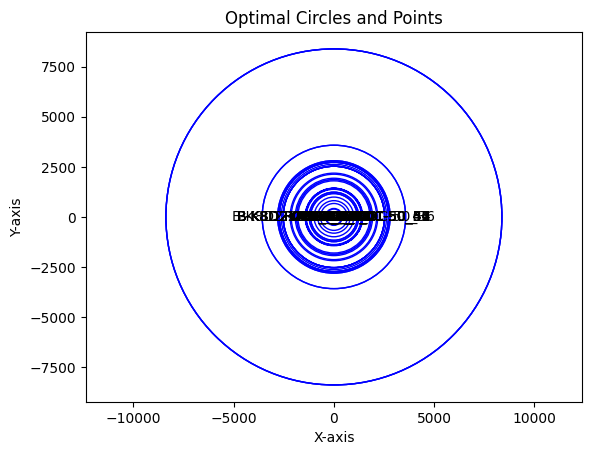

Current iteration - Optimal values:  1.0088647575268956 1.0282892816488216 [-0.00851239  0.00089234  0.00457144  0.01353447 -0.00738944  0.0161987
 -0.00466754  0.01905322  0.00685845  0.0393748   0.03366636  0.02951527
 -0.00311794  0.00888546 -0.00544887  0.01639119  0.01404561  0.00471969
  0.0214314   0.01668248 -0.00100658 -0.00081322  0.00287281 -0.00389033
  0.01434926  0.00102779  0.01509403  0.00402489  0.00666115  0.00381147
 -0.00040385  0.00671303 -0.00203525  0.00584239 -0.00242683  0.01111936
  0.00364142 -0.00024262  0.00256465  0.00446659 -0.00613669  0.01125422
  0.00782634  0.003415    0.01397992  0.00795652 -0.00247429  0.00605527
  0.0037702  -0.00427311 -0.00116878 -0.00236327 -0.00510302  0.00286929
 -0.00704802  0.00309597  0.00554942  0.0233455  -0.00218767  0.00350907
  0.0089328   0.00497424 -0.00096965 -0.0032088  -0.00272666] [-2.89278904e-04 -7.18622680e-03  3.60921766e-03  9.56315790e-03
  9.65428773e-04  4.14991658e-03  3.21461179e-02  1.62344294e-02
 -1.

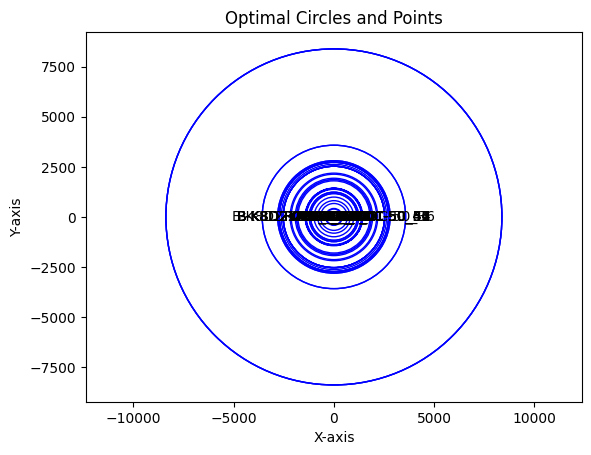

In [ ]:
def objective_function(variables):
    H, W = variables[0], variables[1]
    return H * W

def inequality_constraint(variables):
    H, W = variables[:2]
    x_values = variables[2 : n + 2]
    y_values = variables[n + 2: ]
    constraints = []

    for index in range(n):
        constraints += [
            r[index] - x_values[index],
            x_values[index] - r[index] - W,
            -(x_values[index] + r[index]),
            x_values[index] + r[index] - W,
            y_values[index] - r[index] - H,
            r[index] - y_values[index],
            y_values[index] + r[index] - H,
        ]

    for i in range(n):
        for j in range(i + 1, n):
            if [i, j] not in adjacency:
                constraints.append(
                    (r[i] + r[j]) ** 2 - (x_values[i] - x_values[j]) ** 2 - (y_values[i] - y_values[j]) ** 2
                )

    return np.array(constraints)

def equality_constraint(variables):
    x_values = variables[2 : n + 2]
    y_values = variables[n + 2 : ]
    constraints = []
    for index in gamma:
        constraints.append(y_values[index] - r[index])

    for k1, k2 in adjacency:
        constraints.append(
            (x_values[k1] - x_values[k2]) ** 2 + (y_values[k1] - y_values[k2]) ** 2 - (r[k1] + r[k2]) ** 2
        )

    return np.array(constraints)

def plot_circles_and_points(optimal_x, optimal_y, r, mapping):
    fig, ax = plt.subplots()
    for i in range(n):
        circle = plt.Circle((optimal_x[i], optimal_y[i]), r[i], fill=False, color="blue")
        ax.add_patch(circle)
        plt.text(optimal_x[i] + 0.2, optimal_y[i] + 0.2, mapping[i], fontsize=10, ha="center", va="center", color="black")

    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("Optimal Circles and Points")
    plt.axis("equal")
    plt.show()

def generate_inputs():
    mapping, index_val = dict(), dict()
    count = 0
    r, gamma, adjacency = [], [], []
    print("Upload the file sizes.txt:")
    uploaded_sizes = files.upload()
    for filename, content in uploaded_sizes.items():
        with open("sizes.txt", "r") as file:
            for line in file:
                str_value, size_value = line.strip().split(",")
                mapping[count] = str_value
                index_val[str_value] = count
                r.append(float(size_value))
                count += 1
    n = count
    count = 0
    print("Upload the file anchors.txt:")
    uploaded_anchors = files.upload()
    for filename, content in uploaded_anchors.items():
        with open("anchors.txt", "r") as file:
            for line in file:
                gamma.append(index_val[line.strip()])
                count += 1
    gammas = count
    count = 0
    print("Upload the file edges.txt:")
    uploaded_edges = files.upload()
    for filename, content in uploaded_edges.items():
        with open("edges.txt", "r") as file:
            for line in file:
                str1, str2 = line.strip().split(",")
                k1, k2 = index_val[str1], index_val[str2]
                if k1 > k2:
                    k1, k2 = k2, k1
                adjacency.append([k1, k2])
                count += 1
    adjacencies = count
    return n, gammas, adjacencies, r, gamma, adjacency, mapping

if __name__ == "__main__":
    n, gammas, adjacencies, r, gamma, adjacency, mapping = generate_inputs()
    initial_guess = [1.0, 1.0] + [0.0] * (2 * n)
    constraints = [
        NonlinearConstraint(fun=equality_constraint, lb=0, ub=0),
        NonlinearConstraint(fun=inequality_constraint, lb=-np.inf, ub=0)
    ]

    def callback_function(xk, state):
        optimal_H = xk[0]
        optimal_W = xk[1]
        optimal_x = xk[2 : n + 2]
        optimal_y = xk[n + 2 :]
        print("Current iteration - Optimal values: ", optimal_H, optimal_W, optimal_x, optimal_y)
        plot_circles_and_points(optimal_x, optimal_y, r, mapping)


    result = minimize(
        fun=lambda variables: objective_function(variables),
        x0=initial_guess,
        constraints=constraints,
        method='trust-constr',
        callback=callback_function
    )

In [ ]:
def objective_function(variables):
    H, W = variables[0], variables[1]
    return H * W

def inequality_constraint(variables):
    H, W = variables[:2]
    x_values = variables[2 : n + 2]
    y_values = variables[n + 2: ]
    constraints = []

    for index in range(n):
        constraints += [
            r[index] - x_values[index],
            x_values[index] - r[index] - W,
            -(x_values[index] + r[index]),
            x_values[index] + r[index] - W,
            y_values[index] - r[index] - H,
            r[index] - y_values[index],
            y_values[index] + r[index] - H,
        ]

    for i in range(n):
        for j in range(i + 1, n):
            if [i, j] not in adjacency:
                constraints.append(
                    (r[i] + r[j]) ** 2 - (x_values[i] - x_values[j]) ** 2 - (y_values[i] - y_values[j]) ** 2
                )

    return np.array(constraints)

def equality_constraint(variables):
    x_values = variables[2 : n + 2]
    y_values = variables[n + 2 : ]
    constraints = []
    for index in gamma:
        constraints.append(y_values[index] - r[index])

    for k1, k2 in adjacency:
        constraints.append(
            (x_values[k1] - x_values[k2]) ** 2 + (y_values[k1] - y_values[k2]) ** 2 - (r[k1] + r[k2]) ** 2
        )

    return np.array(constraints)

def plot_circles_and_points(optimal_x, optimal_y, r, mapping):
    fig, ax = plt.subplots()
    for i in range(n):
        circle = plt.Circle((optimal_x[i], optimal_y[i]), r[i], fill=False, color="blue")
        ax.add_patch(circle)
        plt.text(optimal_x[i] + 0.2, optimal_y[i] + 0.2, mapping[i], fontsize=10, ha="center", va="center", color="black")

    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("Optimal Circles and Points")
    plt.axis("equal")
    plt.show()

def generate_inputs():
    mapping, index_val = dict(), dict()
    count = 0
    r, gamma, adjacency = [], [], []
    print("Upload the file sizes.txt:")
    uploaded_sizes = files.upload()
    for filename, content in uploaded_sizes.items():
        with open("sizes1.txt", "r") as file:
            for line in file:
                str_value, size_value = line.strip().split(",")
                mapping[count] = str_value
                index_val[str_value] = count
                r.append(float(size_value))
                count += 1
    n = count
    count = 0
    print("Upload the file anchors.txt:")
    uploaded_anchors = files.upload()
    for filename, content in uploaded_anchors.items():
        with open("anchors1.txt", "r") as file:
            for line in file:
                gamma.append(index_val[line.strip()])
                count += 1
    gammas = count
    count = 0
    print("Upload the file edges.txt:")
    uploaded_edges = files.upload()
    for filename, content in uploaded_edges.items():
        with open("edges1.txt", "r") as file:
            for line in file:
                str1, str2 = line.strip().split(",")
                k1, k2 = index_val[str1], index_val[str2]
                if k1 > k2:
                    k1, k2 = k2, k1
                adjacency.append([k1, k2])
                count += 1
    adjacencies = count
    return n, gammas, adjacencies, r, gamma, adjacency, mapping

if __name__ == "__main__":
    n, gammas, adjacencies, r, gamma, adjacency, mapping = generate_inputs()
    initial_guess = [1.0, 1.0] + [0.0] * (2 * n)
    constraints = [
        NonlinearConstraint(fun=inequality_constraint, lb=-np.inf, ub=0),
        NonlinearConstraint(fun=equality_constraint, lb=0, ub=0)
    ]

    def callback_function(xk, state):
        optimal_H = xk[0]
        optimal_W = xk[1]
        optimal_x = xk[2 : n + 2]
        optimal_y = xk[n + 2 :]
        print("Current iteration - Optimal values: ", optimal_H, optimal_W, optimal_x, optimal_y)
        plot_circles_and_points(optimal_x, optimal_y, r, mapping)


    result = minimize(
        fun=lambda variables: objective_function(variables),
        x0=initial_guess,
        constraints=constraints,
        method='trust-constr',
        callback=callback_function
    )

Output hidden; open in https://colab.research.google.com to view.

Upload the file sizes.txt:


Saving sizes3.txt to sizes3 (1).txt
Upload the file anchors.txt:


Saving anchors3.txt to anchors3 (1).txt
Upload the file edges.txt:


Saving edges3.txt to edges3.txt
Current iteration - Optimal values:  1.0 1.0 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_trustregion_constr/projections.py:181: UserWarning: Singular Jacobian matrix. Using SVD decomposition to perform the factorizations.
  warn('Singular Jacobian matrix. Using SVD decomposition to ' +


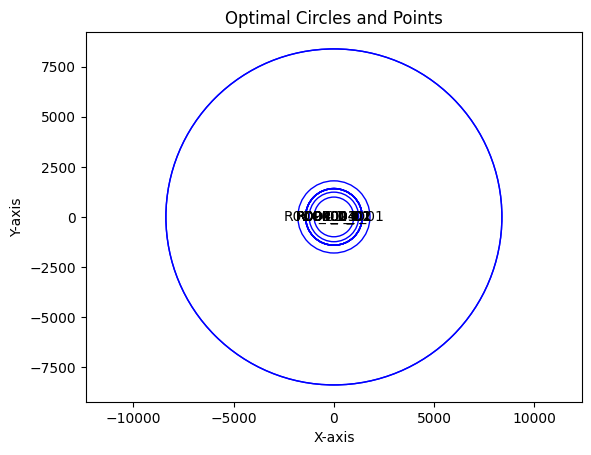

Current iteration - Optimal values:  1.0554102811442094 1.1281035998783726 [-0.01703023  0.03514811 -0.00722015 -0.00312969 -0.01007676  0.01549672
  0.14623695 -0.01402728  0.01160174 -0.00496892  0.00929307  0.04084037] [-0.00606266  0.00428909  0.02447596  0.03605109  0.03134539  0.01338349
  0.04410409  0.00277154  0.07809085 -0.0245452  -0.00069489  0.01649561]


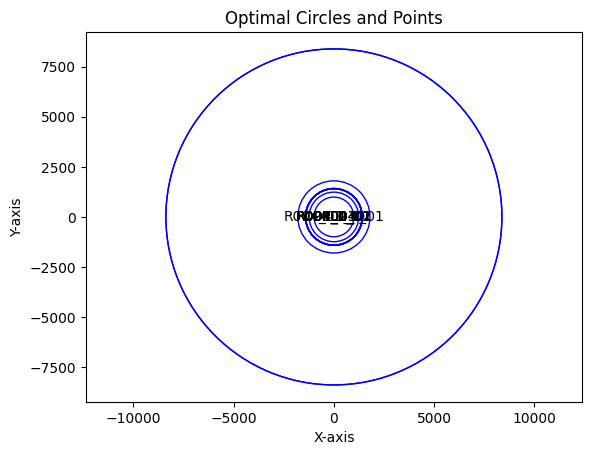

Current iteration - Optimal values:  1.65636823416527 1.6374645606665765 [ 0.31902944  0.25254901 -0.06491216  0.12644808  0.23557912  0.42681805
  2.37385596 -0.12815175  0.84678929  0.10015162  0.26182077  0.94653881] [ 0.07230357  0.07972911  0.43415249  0.3773661   0.51030953  0.07066336
  1.16521429  0.12392728  1.17546778 -0.19621446 -0.34158394  0.26684201]


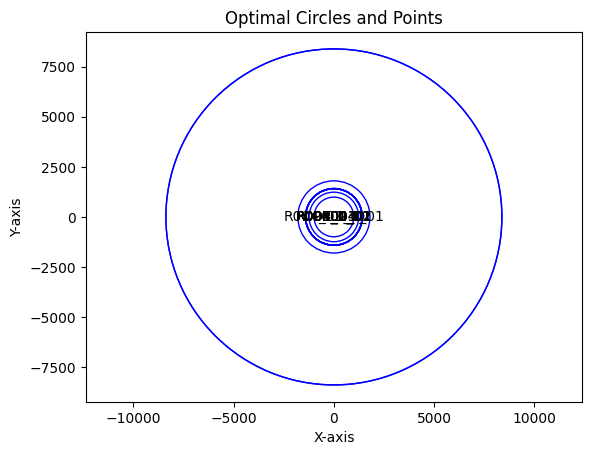

Current iteration - Optimal values:  2.3170076831688373 2.8867799072985303 [ 0.78746437  0.75551428 -3.27668162  0.63108328  0.80452917  1.4030433
 13.58737226 -0.19791211  2.11026284  0.35617514  0.70020249  2.0356933 ] [-0.02555866  0.23411759  1.21315042  0.65490755  1.10279318  0.21657718
  5.51100189  0.00622259  2.14518003 -0.66272991 -0.88050904 -0.08669382]


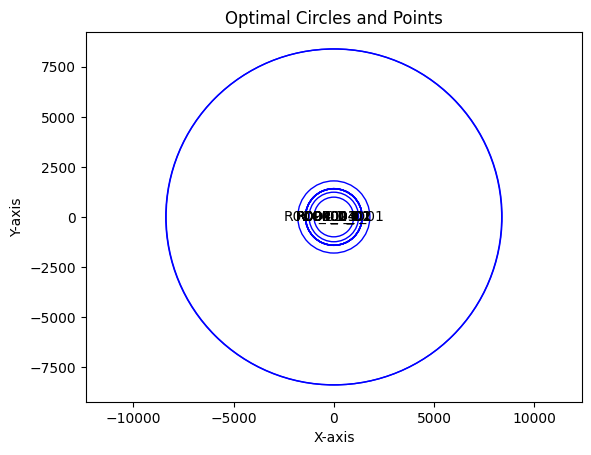

Current iteration - Optimal values:  2.2726528495998566 5.532520817454953 [-3.35455393e-03  1.72469123e-01 -3.44202252e+01 -4.64325558e-01
 -1.85288411e-02  1.02119698e+00  8.04143233e+01 -1.98295110e+00
  2.85732075e+00 -1.13286271e+00 -3.92598511e-01  2.38431069e+00] [-2.19681225 -1.49831215 -0.19776447 -0.83975191  0.10049579 -2.10983353
 28.45755526 -2.15490174  1.87252681 -3.83930062 -4.15505391 -2.86537066]


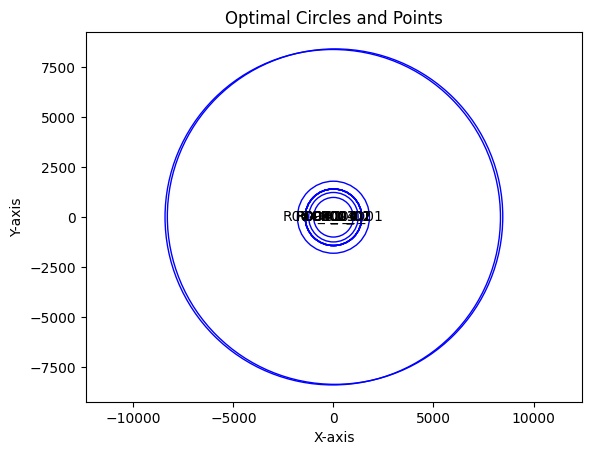

Current iteration - Optimal values:  1.8238573473037678 7.053639607911793 [ -13.25900462  -11.66495877 -246.74263777  -15.21298917  -12.74328341
  -11.20292912  437.18038003  -17.0448686    -7.84950548  -15.46802527
  -14.05612291   -8.71724384] [-12.97937321 -10.84015611 -21.7392428  -11.08158905  -8.34140072
 -12.79051946 148.50585459 -12.86992136  -5.28625243 -16.06882762
 -16.6620393  -14.21996957]


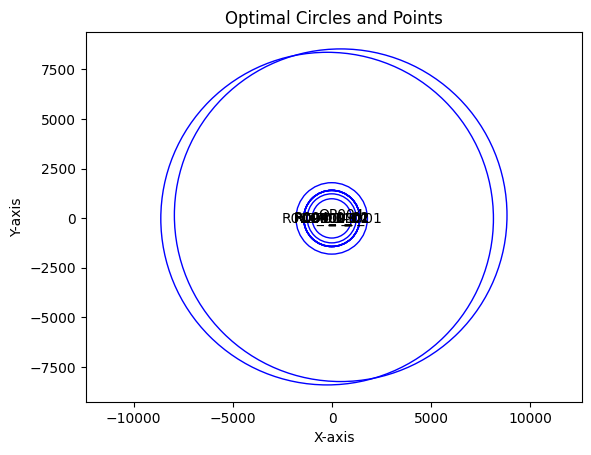

Current iteration - Optimal values:  1.7076782330484872 7.919605688431386 [  -77.84681202   -69.55449968 -1546.8574752    -86.96782148
   -74.56251486   -74.05446031  2381.49643028   -84.83792874
   -67.88354496   -81.92160091   -79.30911828   -69.46147644] [ -59.07758882  -51.4406256  -200.11742063  -59.07295377  -49.06416462
  -58.73331955  777.52038979  -58.87463175  -44.85964347  -64.77206155
  -65.87722579  -61.3655091 ]


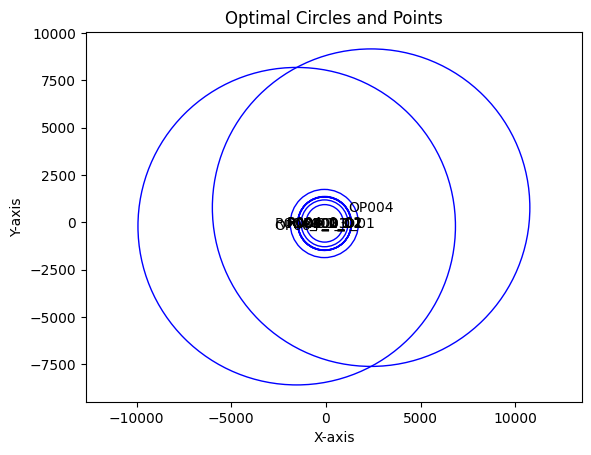

Current iteration - Optimal values:  0.9993757507897508 10.467307961470834 [ -343.92883857  -303.72989754 -9436.94367758  -386.58362898
  -327.1095159   -337.0932705  12926.02764042  -356.53990036
  -326.16943328  -351.19173912  -346.46288642  -328.76815873] [ -261.05679768  -229.38223951 -1483.49548255  -278.58278468
  -235.18589473  -260.47864193  4049.84554943  -260.58200274
  -234.85835744  -271.54934839  -273.6329518   -265.41887933]


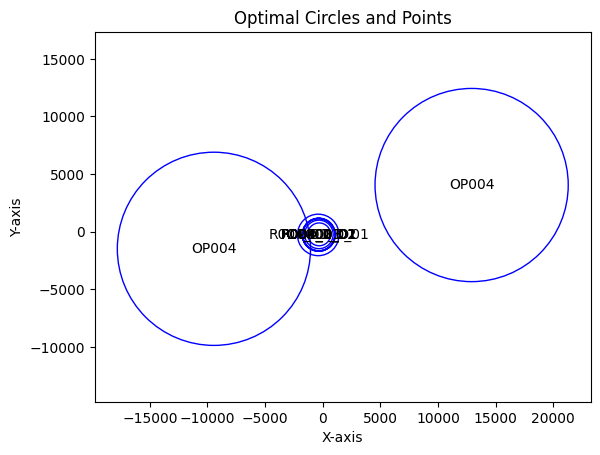

Current iteration - Optimal values:  0.7854740070600832 7.717429860226298 [  -87.06870482   -45.60015572 -8613.667324    -131.36057232
   -69.92261807   -80.89572058  9547.86104923   -98.49479913
   -71.63869402   -93.38343094   -89.05185239   -73.23804339] [ -181.65264795  -146.9143719  -1259.05393597  -202.40754569
  -154.563963    -181.24820486  3030.75061995  -180.87080735
  -156.11739951  -191.8748214   -194.05705965  -186.35090583]


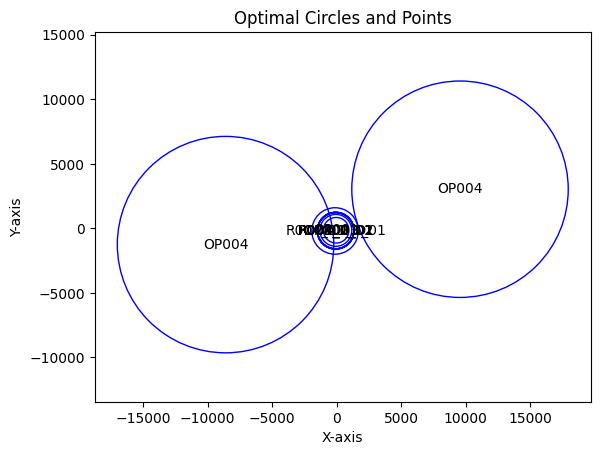

Current iteration - Optimal values:  0.6169876848195484 9.53331575702789 [ 1.53647830e+01  5.48223005e+01 -8.85601311e+03 -2.81925687e+01
  3.14671828e+01  2.09537802e+01  8.79145734e+03  4.97219308e+00
  2.85676937e+01  9.95507571e+00  1.39539498e+01  2.80623635e+01] [ -163.40386023  -122.71454148 -1237.46341463  -190.11192369
  -133.38193842  -163.18199923  2824.21366854  -162.24173645
  -137.64240471  -173.71115714  -176.08977419  -168.66622519]


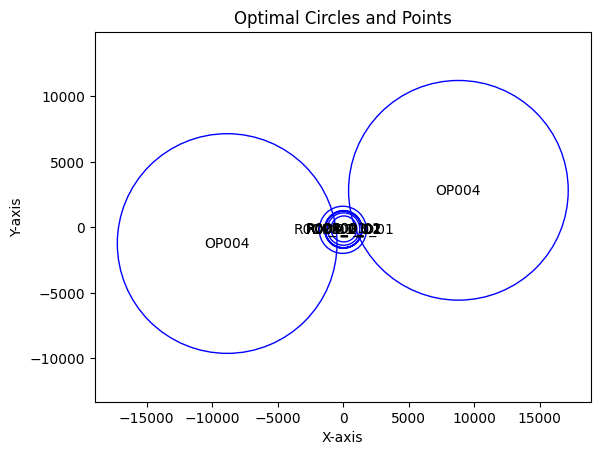

Current iteration - Optimal values:  0.34672493582526603 16.575507472390942 [ 4.65219449e+01  8.01461259e+01 -9.09527218e+03  7.31563393e+00
  5.99708109e+01  5.15985570e+01  8.80900945e+03  3.70325686e+01
  5.77231479e+01  4.19250903e+01  4.56367008e+01  5.82358519e+01] [ -169.01235759  -121.86910368 -1227.69000083  -202.30471832
  -135.67756129  -168.95727225  2867.82672825  -167.48111178
  -142.70235781  -179.53420497  -182.12699288  -174.86910466]


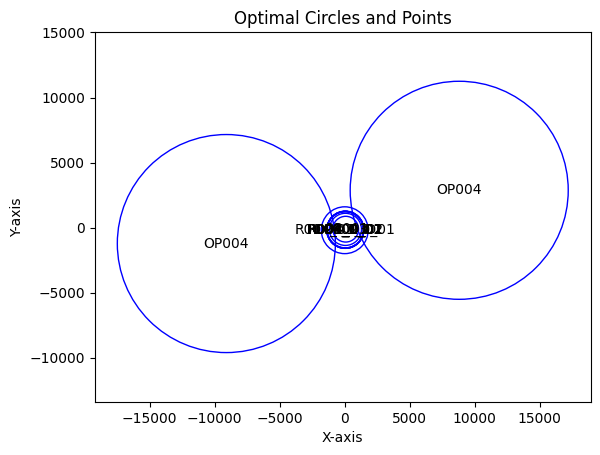

Current iteration - Optimal values:  0.34800499918270905 25.000129333487116 [   68.38541901    89.07603171 -9071.28480753    39.78708586
    75.94874227    72.50539038  8678.07019415    60.58319429
    75.85684465    65.30274966    68.47759987    78.26152765] [ -184.74203789  -124.24789568 -1128.64417975  -232.01767612
  -144.59172355  -184.99721383  2920.81546561  -182.51979926
  -157.33586368  -195.69290103  -198.69085934  -191.7201798 ]


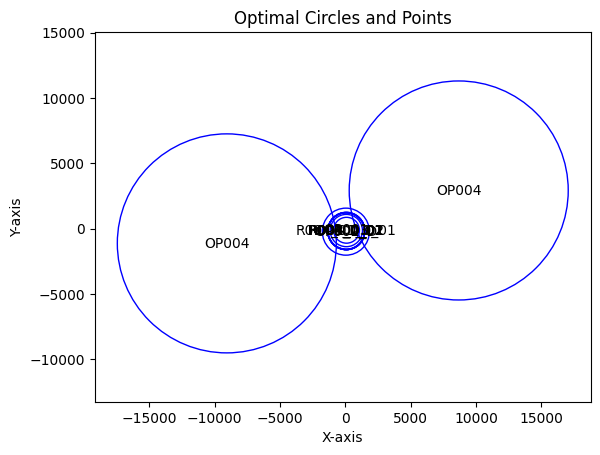

Current iteration - Optimal values:  0.3533756783906354 33.10583702937751 [   76.82634604    88.77057885 -9140.28308915    56.10674777
    80.32304831    80.40166942  8766.20036264    69.97737234
    82.05790213    74.65194245    77.53281512    85.68249645] [ -201.94754927  -129.49330549 -1065.33802261  -262.18130107
  -155.70332454  -202.40116967  3025.13784638  -199.25917568
  -173.4509819   -213.32807343  -216.62404326  -209.73150507]


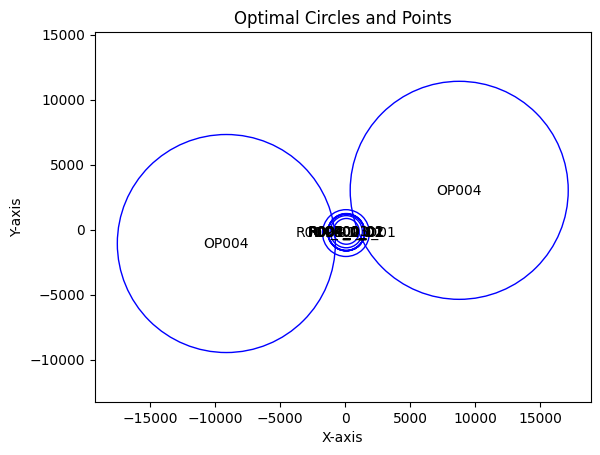

Current iteration - Optimal values:  0.39221208557142523 33.840219663966174 [   83.04008344    85.59706701 -9064.5610182     71.40400815
    82.08002313    86.05017057  8643.29206891    77.17628548
    85.88187143    81.83422431    84.41653591    90.85265302] [-219.50952157 -131.22573158 -956.51146    -297.42516191 -165.25620139
 -220.1807882  3086.91539729 -216.29965593 -189.65455752 -231.42561998
 -235.06461243 -228.21419607]


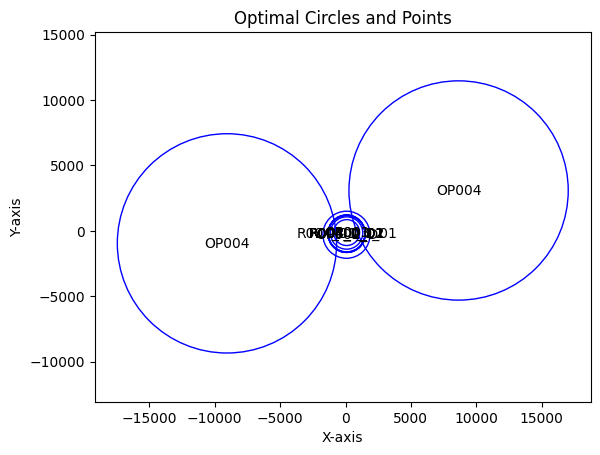

Current iteration - Optimal values:  0.9234913442958734 33.229456038395035 [   86.85570032    81.90734887 -9176.50243556    82.98362509
    82.26434063    89.48470482  8714.18550096    81.64787362
    87.95736964    86.35404371    88.74803822    93.99420132] [-238.54827161 -134.43438848 -881.10646346 -334.72540023 -176.26298218
 -239.39073184 3203.26080893 -234.90684564 -207.28099037 -251.0223785
 -254.96540083 -248.05520851]


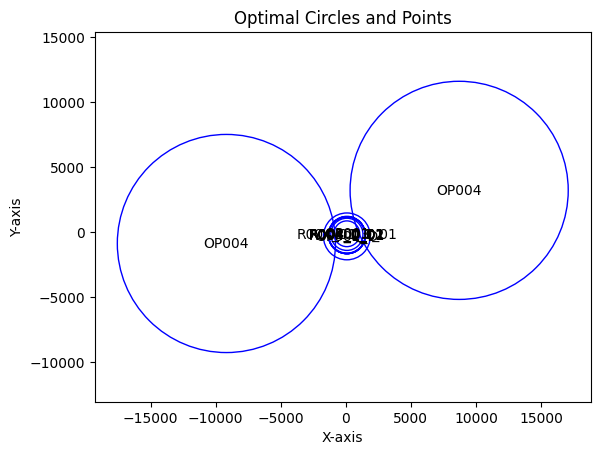

Current iteration - Optimal values:  0.9254829490841421 33.410349247743305 [   91.86480902    78.76177347 -9082.23683853    96.97955989
    83.27559524    94.11688104  8576.07038732    87.30227474
    91.18524162    92.08354073    94.29713556    98.35002906] [-258.0482682  -134.51834964 -759.6399205  -377.35537082 -185.94546474
 -259.07050821 3271.29335749 -253.94550668 -225.16713313 -271.15977131
 -275.43483085 -268.42703086]


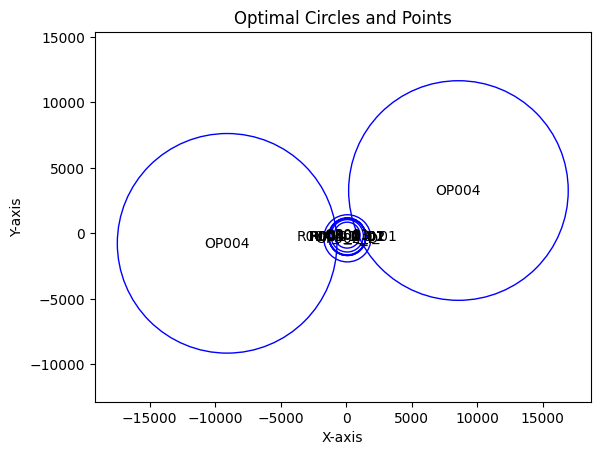

KeyboardInterrupt: ignored

In [ ]:
def objective_function(variables):
    H, W = variables[0], variables[1]
    return H * W

def inequality_constraint(variables):
    H, W = variables[:2]
    x_values = variables[2 : n + 2]
    y_values = variables[n + 2: ]
    constraints = []

    for index in range(n):
        constraints += [
            r[index] - x_values[index],
            x_values[index] - r[index] - W,
            -(x_values[index] + r[index]),
            x_values[index] + r[index] - W,
            y_values[index] - r[index] - H,
            r[index] - y_values[index],
            y_values[index] + r[index] - H,
        ]

    for i in range(n):
        for j in range(i + 1, n):
            if [i, j] not in adjacency:
                constraints.append(
                    (r[i] + r[j]) ** 2 - (x_values[i] - x_values[j]) ** 2 - (y_values[i] - y_values[j]) ** 2
                )

    return np.array(constraints)

def equality_constraint(variables):
    x_values = variables[2 : n + 2]
    y_values = variables[n + 2 : ]
    constraints = []
    for index in gamma:
        constraints.append(y_values[index] - r[index])

    for k1, k2 in adjacency:
        constraints.append(
            (x_values[k1] - x_values[k2]) ** 2 + (y_values[k1] - y_values[k2]) ** 2 - (r[k1] + r[k2]) ** 2
        )

    return np.array(constraints)

def plot_circles_and_points(optimal_x, optimal_y, r, mapping):
    fig, ax = plt.subplots()
    for i in range(n):
        circle = plt.Circle((optimal_x[i], optimal_y[i]), r[i], fill=False, color="blue")
        ax.add_patch(circle)
        plt.text(optimal_x[i] + 0.2, optimal_y[i] + 0.2, mapping[i], fontsize=10, ha="center", va="center", color="black")

    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("Optimal Circles and Points")
    plt.axis("equal")
    plt.show()

def generate_inputs():
    mapping, index_val = dict(), dict()
    count = 0
    r, gamma, adjacency = [], [], []
    print("Upload the file sizes.txt:")
    uploaded_sizes = files.upload()
    for filename, content in uploaded_sizes.items():
        with open("sizes3.txt", "r") as file:
            for line in file:
                str_value, size_value = line.strip().split(",")
                mapping[count] = str_value
                index_val[str_value] = count
                r.append(float(size_value))
                count += 1
    n = count
    count = 0
    print("Upload the file anchors.txt:")
    uploaded_anchors = files.upload()
    for filename, content in uploaded_anchors.items():
        with open("anchors3.txt", "r") as file:
            for line in file:
                gamma.append(index_val[line.strip()])
                count += 1
    gammas = count
    count = 0
    print("Upload the file edges.txt:")
    uploaded_edges = files.upload()
    for filename, content in uploaded_edges.items():
        with open("edges3.txt", "r") as file:
            for line in file:
                str1, str2 = line.strip().split(",")
                k1, k2 = index_val[str1], index_val[str2]
                if k1 > k2:
                    k1, k2 = k2, k1
                adjacency.append([k1, k2])
                count += 1
    adjacencies = count
    return n, gammas, adjacencies, r, gamma, adjacency, mapping

if __name__ == "__main__":
    n, gammas, adjacencies, r, gamma, adjacency, mapping = generate_inputs()
    initial_guess = [1.0, 1.0] + [0.0] * (2 * n)
    constraints = [
        NonlinearConstraint(fun=inequality_constraint, lb=-np.inf, ub=0),
        NonlinearConstraint(fun=equality_constraint, lb=0, ub=0)
    ]

    def callback_function(xk, state):
        optimal_H = xk[0]
        optimal_W = xk[1]
        optimal_x = xk[2 : n + 2]
        optimal_y = xk[n + 2 :]
        print("Current iteration - Optimal values: ", optimal_H, optimal_W, optimal_x, optimal_y)
        plot_circles_and_points(optimal_x, optimal_y, r, mapping)


    result = minimize(
        fun=lambda variables: objective_function(variables),
        x0=initial_guess,
        constraints=constraints,
        method='trust-constr',
        callback=callback_function
    )

In [1]:
import numpy as np
from scipy.optimize import minimize, LinearConstraint, NonlinearConstraint
import matplotlib.pyplot as plt
from google.colab import files

def objective_function(variables):
    return 1

def adjacency_constraint(variables):
    x_values = variables[: n]
    y_values = variables[n: ]
    constraints = []
    for k1, k2 in adjacency:
        distance = np.sqrt((x_values[k1] - x_values[k2]) ** 2 + (y_values[k1] - y_values[k2]) ** 2)
        constraints.append(distance - (r[k1] + r[k2]))
    return np.array(constraints)

def no_overlap(variables):
    x_values = variables[: n]
    y_values = variables[n: ]
    constraints = []
    for i in range(n):
        for j in range(i + 1, n):
            if [i, j] not in adjacency:
                distance = np.sqrt((x_values[i] - x_values[j]) ** 2 + (y_values[i] - y_values[j]) ** 2)
                constraints.append((r[i] + r[j]) - distance)
    return np.array(constraints)

def fixed(variables):
    y_values = variables[n: ]
    constraints = []
    for index in gamma:
        constraints.append(y_values[index] - 99999)
    return np.array(constraints)

def boundaries(variables):
    y_values = variables[n: ]
    constraints = []
    for index in range(n):
        if index not in gamma:
            constraints.append(99999 - y_values[index])
    return np.array(constraints)

def plot_intermediate(optimal_x, optimal_y, r, mapping):
    fig, ax = plt.subplots()
    for i in range(n):
        circle = plt.Circle((optimal_x[i], optimal_y[i]), r[i], fill=False, color="blue")
        ax.add_patch(circle)
        plt.text(optimal_x[i] + 0.2, optimal_y[i] + 0.2, mapping[i], fontsize=7, ha="center", va="center", color="black")

    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("Intermediate Plot")
    plt.axis("equal")
    plt.show()

def plot(optimal_x, optimal_y, r, mapping):
    fig, ax = plt.subplots()
    for i in range(n):
        circle = plt.Circle((optimal_x[i], optimal_y[i]), r[i], fill=False, color="blue")
        ax.add_patch(circle)
        plt.text(optimal_x[i] + 0.2, optimal_y[i] + 0.2, mapping[i], fontsize=7, ha="center", va="center", color="black")

    min_x, min_y, max_x, max_y = optimal_x[0] - r[0], optimal_y[0] - r[0], optimal_x[0] + r[0], optimal_y[0] + r[0]
    for index in range(n):
        min_x = min(min_x, optimal_x[index] - r[index])
        max_x = max(max_x, optimal_x[index] + r[index])
        min_y = min(min_y, optimal_y[index] - r[index])
        max_y = max(max_y, optimal_y[index] + r[index])

    rect = plt.Rectangle((min_x, min_y), max_x - min_x, max_y - min_y, fill=False, color="red", linestyle="--", linewidth=2)
    ax.add_patch(rect)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("Final Plot with Bounding Box")
    plt.axis("equal")
    plt.show()

def generate_inputs():
    mapping, index_val = dict(), dict()
    count = 0
    r, gamma, adjacency = [], [], []
    print("Upload the file sizes.txt:")
    uploaded_sizes = files.upload()
    for filename, content in uploaded_sizes.items():
        with open("sizes4.txt", "r") as file:
            for line in file:
                str_value, size_value = line.strip().split(",")
                mapping[count] = str_value
                index_val[str_value] = count
                r.append(float(size_value))
                count += 1
    n = count
    count = 0
    print("Upload the file anchors.txt:")
    uploaded_anchors = files.upload()
    for filename, content in uploaded_anchors.items():
        with open("anchors4.txt", "r") as file:
            for line in file:
                gamma.append(index_val[line.strip()])
                count += 1
    gammas = count
    count = 0
    print("Upload the file edges.txt:")
    uploaded_edges = files.upload()
    for filename, content in uploaded_edges.items():
        with open("edges4.txt", "r") as file:
            for line in file:
                str1, str2 = line.strip().split(",")
                k1, k2 = index_val[str1], index_val[str2]
                if k1 > k2:
                    k1, k2 = k2, k1
                adjacency.append([k1, k2])
                count += 1
    adjacencies = count
    return n, gammas, adjacencies, r, gamma, adjacency, mapping

def callback_function(xk, state):
    optimal_x = xk[: n]
    optimal_y = xk[n :]
    plot_intermediate(optimal_x, optimal_y, r, mapping)

if __name__ == "__main__":
    n, gammas, adjacencies, r, gamma, adjacency, mapping = generate_inputs()
    print(n, gammas, adjacencies, r, adjacency, gamma, mapping)
    initial_guess = [0.0] * (2 * n)
    constraints1 = [
        NonlinearConstraint(fun=fixed, lb=0, ub=0),
        NonlinearConstraint(fun=boundaries, lb=-np.inf, ub=0)
    ]

    constraints2 = [
        NonlinearConstraint(fun=adjacency_constraint, lb=0, ub=0),
        NonlinearConstraint(fun=no_overlap, lb=-np.inf, ub=0)
    ]

    result1 = minimize(
        fun=lambda variables: objective_function(variables),
        x0=initial_guess,
        constraints=constraints1,
        method='trust-constr',
        callback=callback_function
    )

    result2 = minimize(
        fun=lambda variables: objective_function(variables),
        x0=result1.x,
        constraints=constraints2,
        method='trust-constr',
        callback=callback_function
    )

    plot(result2.x[:n], result2.x[n:], r, mapping)

Output hidden; open in https://colab.research.google.com to view.